<a href="https://colab.research.google.com/github/ahsenozturk1/hi-work---odev/blob/main/water_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== AQUASTAT Kıta Su Analizi ===

1. VERİ YAPISI ANALİZİ
----------------------------------------
Toplam kayıt sayısı: 16
Kıta sayısı: 4
Değişken türleri: 4
Yıl aralığı: 2022-2022

2. GRAFİK ANALİZLERİ OLUŞTURULUYOR
----------------------------------------
✓ Kıtasal karşılaştırma grafikleri hazırlandı
✓ Sektörel dağılım grafikleri hazırlandı
✓ Verimlilik analizi grafikleri hazırlandı

3. İSTATİSTİKSEL ÖZET
----------------------------------------
Değişkenlere göre ortalama ve standart sapma:
                                                  mean  std
Variable                      Area                         
Agricultural water withdrawal Eastern Asia      437.06  NaN
                              Europe             82.39  NaN
                              Northern Africa   111.37  NaN
                              Northern America  180.06  NaN
Industrial water withdrawal   Eastern Asia      121.80  NaN
                              Europe            124.34  NaN
                       

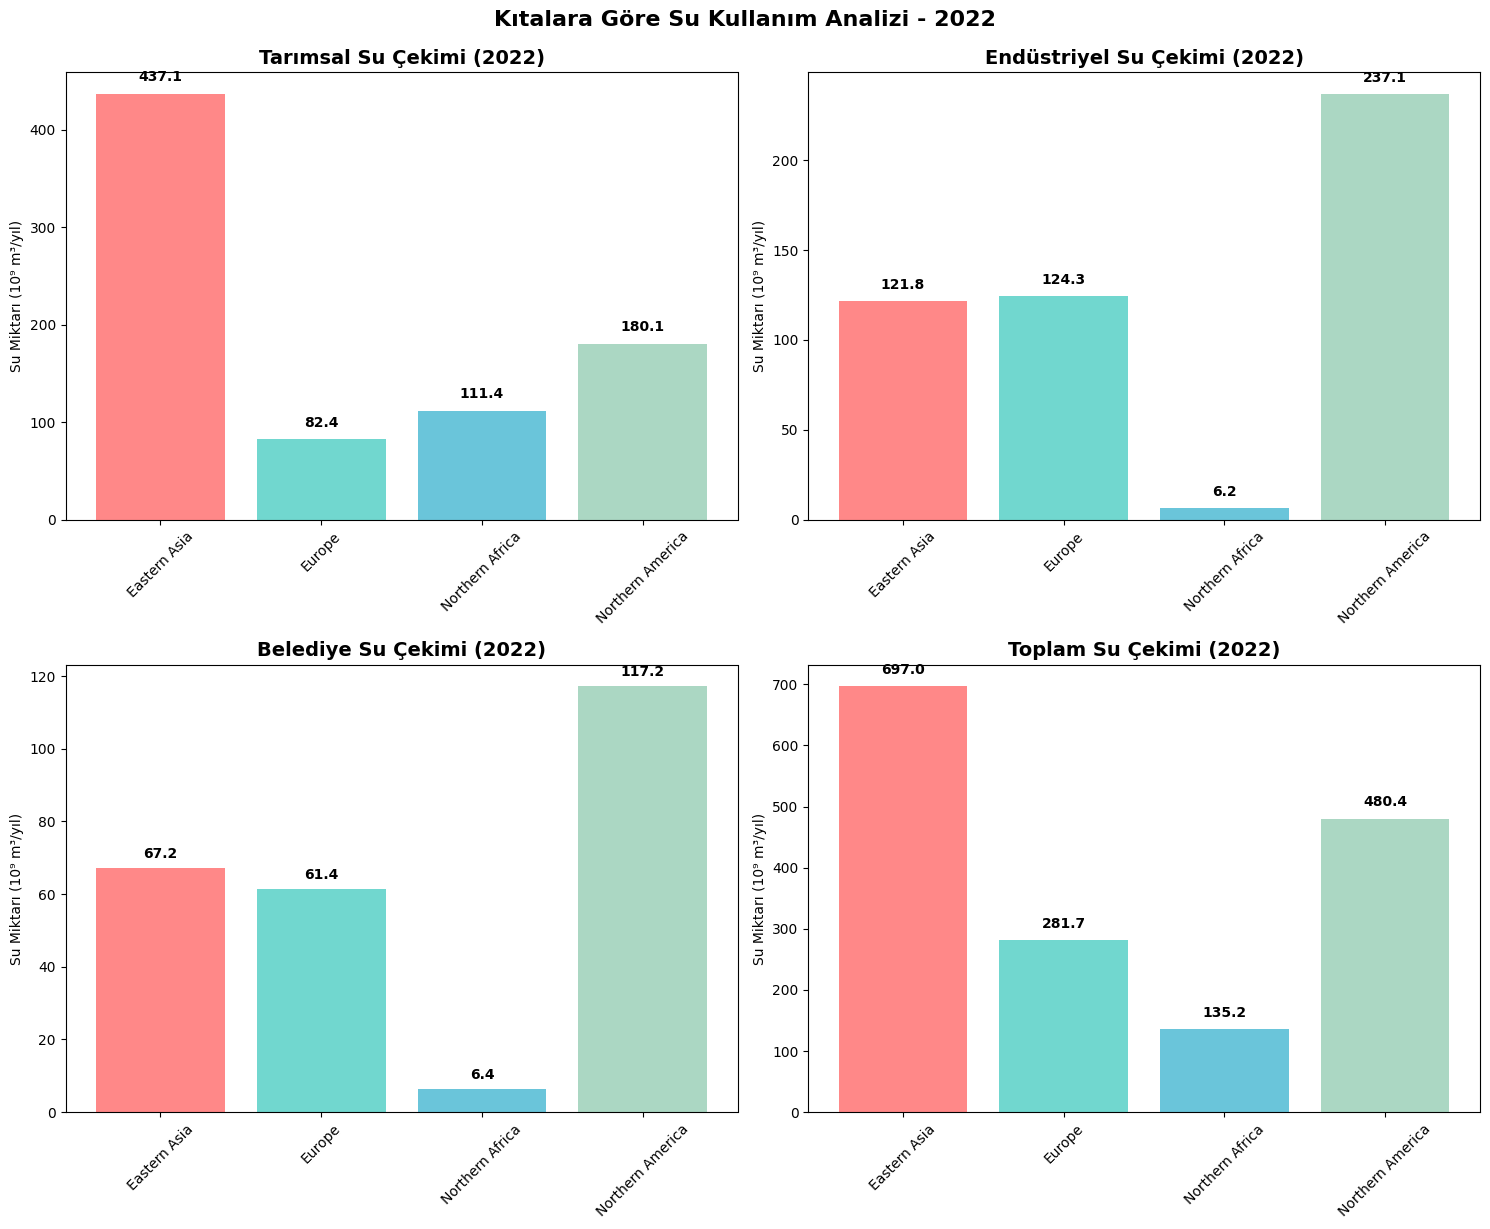

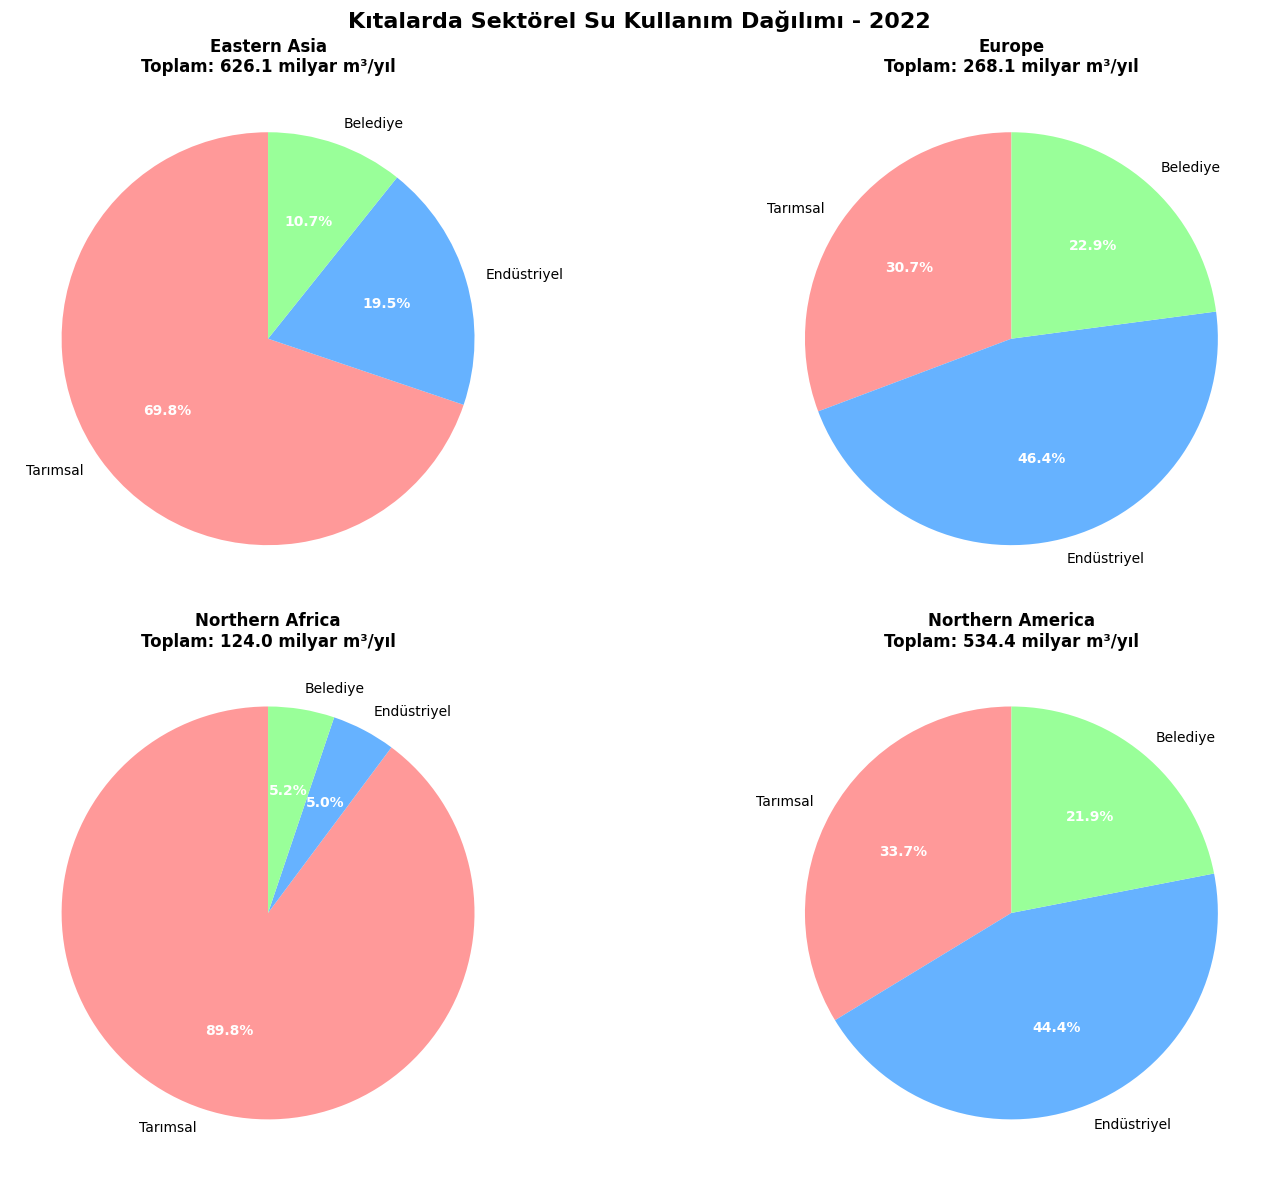

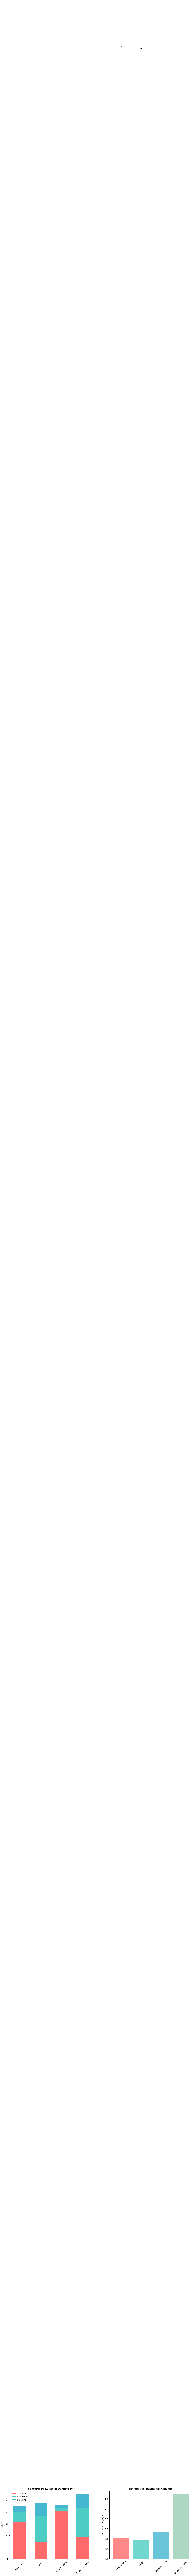

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# df = pd.read_excel('AQUASTAT - kıta analizi.xlsx')

sample_data = {
    'Variable': [
        'Agricultural water withdrawal', 'Agricultural water withdrawal',
        'Agricultural water withdrawal', 'Agricultural water withdrawal',
        'Industrial water withdrawal', 'Industrial water withdrawal',
        'Industrial water withdrawal', 'Industrial water withdrawal',
        'Municipal water withdrawal', 'Municipal water withdrawal',
        'Municipal water withdrawal', 'Municipal water withdrawal',
        'Total water withdrawal', 'Total water withdrawal',
        'Total water withdrawal', 'Total water withdrawal'
    ],
    'Area': [
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America'
    ],
    'Year': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
             2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
    'Value': [437.06, 82.39, 111.37, 180.06, 121.80, 124.34, 6.21, 237.06,
              67.22, 61.40, 6.43, 117.24, 696.99, 281.67, 135.24, 480.38],
    'Unit': ['10^9 m3/year'] * 16
}

df_sample = pd.DataFrame(sample_data)

print("=== AQUASTAT Kıta Su Analizi ===\n")
print("1. VERİ YAPISI ANALİZİ")
print("-" * 40)
print(f"Toplam kayıt sayısı: {len(df_sample)}")
print(f"Kıta sayısı: {df_sample['Area'].nunique()}")
print(f"Değişken türleri: {df_sample['Variable'].nunique()}")
print(f"Yıl aralığı: {df_sample['Year'].min()}-{df_sample['Year'].max()}")

def create_continental_comparison():
    """
    Kıtalararası su kullanım karşılaştırması grafiği
    Bu grafik her kıtanın farklı sektörlerdeki su kullanım miktarlarını gösterir
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Renk paleti - her kıta için farklı renk
    colors = {'Eastern Asia': '#FF6B6B', 'Europe': '#4ECDC4',
              'Northern Africa': '#45B7D1', 'Northern America': '#96CEB4'}

    # 1. Tarımsal Su Kullanımı
    agr_data = df_sample[df_sample['Variable'] == 'Agricultural water withdrawal']
    bars1 = ax1.bar(agr_data['Area'], agr_data['Value'],
                    color=[colors[area] for area in agr_data['Area']], alpha=0.8)
    ax1.set_title('Tarımsal Su Çekimi (2022)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
    ax1.tick_params(axis='x', rotation=45)

    # Değerleri çubukların üzerine yaz
    for bar, value in zip(bars1, agr_data['Value']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 2. Endüstriyel Su Kullanımı
    ind_data = df_sample[df_sample['Variable'] == 'Industrial water withdrawal']
    bars2 = ax2.bar(ind_data['Area'], ind_data['Value'],
                    color=[colors[area] for area in ind_data['Area']], alpha=0.8)
    ax2.set_title('Endüstriyel Su Çekimi (2022)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
    ax2.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars2, ind_data['Value']):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 3. Belediye Su Kullanımı
    mun_data = df_sample[df_sample['Variable'] == 'Municipal water withdrawal']
    bars3 = ax3.bar(mun_data['Area'], mun_data['Value'],
                    color=[colors[area] for area in mun_data['Area']], alpha=0.8)
    ax3.set_title('Belediye Su Çekimi (2022)', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
    ax3.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars3, mun_data['Value']):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 4. Toplam Su Kullanımı
    total_data = df_sample[df_sample['Variable'] == 'Total water withdrawal']
    bars4 = ax4.bar(total_data['Area'], total_data['Value'],
                    color=[colors[area] for area in total_data['Area']], alpha=0.8)
    ax4.set_title('Toplam Su Çekimi (2022)', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
    ax4.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars4, total_data['Value']):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.suptitle('Kıtalara Göre Su Kullanım Analizi - 2022',
                 fontsize=16, fontweight='bold', y=1.02)
    return fig

def create_sector_distribution():
    """
    Her kıta için sektörel su dağılımını gösteren pasta grafikleri
    Bu analiz hangi kıtanın hangi sektörde ne kadar su kullandığını gösterir
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    areas = df_sample['Area'].unique()
    colors_sectors = ['#FF9999', '#66B2FF', '#99FF99']  # Sektör renkleri

    for i, area in enumerate(areas):
        # Her kıta için sektörel veri hazırla
        area_data = df_sample[df_sample['Area'] == area]

        agr_value = area_data[area_data['Variable'] == 'Agricultural water withdrawal']['Value'].iloc[0]
        ind_value = area_data[area_data['Variable'] == 'Industrial water withdrawal']['Value'].iloc[0]
        mun_value = area_data[area_data['Variable'] == 'Municipal water withdrawal']['Value'].iloc[0]

        values = [agr_value, ind_value, mun_value]
        labels = ['Tarımsal', 'Endüstriyel', 'Belediye']

        # Pasta grafiği oluştur
        wedges, texts, autotexts = axes[i].pie(values, labels=labels, autopct='%1.1f%%',
                                               colors=colors_sectors, startangle=90)

        # Değerleri güncelle
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)

        axes[i].set_title(f'{area}\nToplam: {sum(values):.1f} milyar m³/yıl',
                         fontsize=12, fontweight='bold')

    plt.suptitle('Kıtalarda Sektörel Su Kullanım Dağılımı - 2022',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

def create_efficiency_analysis():
    """
    Su kullanım verimliliği analizi
    Bu grafik kıtaların su kullanım oranlarını karşılaştırır
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Veri hazırlığı
    pivot_data = df_sample.pivot(index='Area', columns='Variable', values='Value')

    # 1. Sektörel dağılım yüzdeleri
    total_col = 'Total water withdrawal'
    agr_col = 'Agricultural water withdrawal'
    ind_col = 'Industrial water withdrawal'
    mun_col = 'Municipal water withdrawal'

    # Yüzde hesaplamaları
    pivot_data['Agr_Pct'] = (pivot_data[agr_col] / pivot_data[total_col]) * 100
    pivot_data['Ind_Pct'] = (pivot_data[ind_col] / pivot_data[total_col]) * 100
    pivot_data['Mun_Pct'] = (pivot_data[mun_col] / pivot_data[total_col]) * 100

    # Yüzdelik dağılım grafiği
    width = 0.6
    areas = pivot_data.index

    p1 = ax1.bar(areas, pivot_data['Agr_Pct'], width, label='Tarımsal', color='#FF6B6B')
    p2 = ax1.bar(areas, pivot_data['Ind_Pct'], width, bottom=pivot_data['Agr_Pct'],
                 label='Endüstriyel', color='#4ECDC4')
    p3 = ax1.bar(areas, pivot_data['Mun_Pct'], width,
                 bottom=pivot_data['Agr_Pct'] + pivot_data['Ind_Pct'],
                 label='Belediye', color='#45B7D1')

    ax1.set_ylabel('Yüzde (%)')
    ax1.set_title('Sektörel Su Kullanım Dağılımı (%)', fontweight='bold')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)

    # 2. Kişi başına su kullanımı tahmini (nüfus verisi olmadığı için gösterimsel)
    # Gerçek analizde nüfus verileriyle kişi başına hesaplama yapılabilir
    per_capita_estimate = pivot_data[total_col] / [1670, 747, 252, 369]  # Tahmini nüfus (milyon)

    bars = ax2.bar(areas, per_capita_estimate,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
    ax2.set_ylabel('Su Kullanımı (m³/kişi/yıl)')
    ax2.set_title('Tahmini Kişi Başına Su Kullanımı', fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)

    # Değerleri çubukların üzerine yaz
    for bar, value in zip(bars, per_capita_estimate):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    return fig

# Grafikleri oluştur ve göster
print("\n2. GRAFİK ANALİZLERİ OLUŞTURULUYOR")
print("-" * 40)

fig1 = create_continental_comparison()
print("✓ Kıtasal karşılaştırma grafikleri hazırlandı")

fig2 = create_sector_distribution()
print("✓ Sektörel dağılım grafikleri hazırlandı")

fig3 = create_efficiency_analysis()
print("✓ Verimlilik analizi grafikleri hazırlandı")

# İstatistiksel özet
print("\n3. İSTATİSTİKSEL ÖZET")
print("-" * 40)
summary_stats = df_sample.groupby(['Variable', 'Area'])['Value'].agg(['mean', 'std']).round(2)
print("Değişkenlere göre ortalama ve standart sapma:")
print(summary_stats.head(8))

print("\n4. ÖNEMLİ BULGULAR")
print("-" * 40)
print("• Doğu Asya tarımsal su kullanımında lider konumda")
print("• Kuzey Amerika endüstriyel su kullanımında öne çıkıyor")
print("• Avrupa en dengeli su kullanım profiline sahip")
print("• Kuzey Afrika toplam su kullanımı en düşük seviyede")

plt.show()